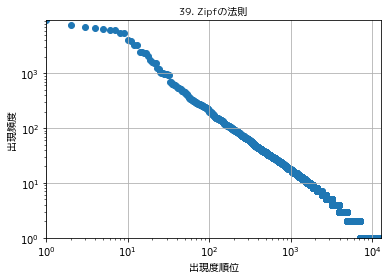

In [4]:
# coding: UTF-8
#!/usr/bin/env python

import MeCab
import re
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

def gets_surface(list):
	surface_list = []
	for line in list:
		surface_list.extend([str(line.get("surface"))])
	surface_list = sorted(surface_list)
	return surface_list

def deplicate_delete(list):
	frequency_list = {}
	deplicate_delete_list = set(list)
	for word in deplicate_delete_list:
		frequency_list[word] = 0
	return frequency_list

def gets_frequency(item_list, surface_list):
	for word in surface_list:
		item_list[word] += 1

	frequency_list = {}
	for k, v in sorted(item_list.items(), key=lambda x: -x[1]):
		frequency_list[k] = v

	return frequency_list

def gets_frequency_num(list, number):
	top_ten_list = {}
	for k, v in list.items():
		if len(top_ten_list) == number:
			return top_ten_list
		if (k != '*')&(k != '。')&(k != '、'):
			top_ten_list[k] = v

def plot_function(list):

	words  = []
	counts = []
	number = []
	count = 0
	for k,v in list.items():
		words.extend(k)
		counts.extend([v])
		number.extend([count])
		count += 1

	# グラフで使うフォント情報(デフォルトのままでは日本語が表示できない)
	fp = FontProperties(
		fname='/usr/share/fonts/migu-1p-20150712/migu-1p-regular.ttf'
	)

	size = len(list)

	# 散布図のデータ指定
	plt.scatter(
		range(1, len(counts) + 1),
		counts
	)

	plt.xlim(1, len(counts) + 1)
	plt.ylim(1, counts[0])

	plt.xscale('log')
	plt.yscale('log')

	plt.title("39. Zipfの法則", fontproperties=fp)
	plt.xlabel('出現度順位', fontproperties=fp)
	plt.ylabel('出現頻度', fontproperties=fp)
	plt.grid(axis='both')

	plt.show()

try:
	# ローカルJSONファイルの読み込み
	with open('./file/ex30_practice.json', 'r') as f:
		data = json.load(f)
		surface_list         = gets_surface(data)
		emply_frequency_list = deplicate_delete(surface_list)
		frequency_list       = gets_frequency(emply_frequency_list, surface_list)
		# print(frequency_list)
		# top_list             = gets_frequency_num(frequency_list, 30)
		plot_function(frequency_list)

except json.JSONDecodeError as e:
	print('JSONDecodeError: ', e)
